# This is my first headline!
### Hello, headline world. My head is spinning.
### ...
### But first we'll need to declare some functions.


In [3]:
def readFeature(rawFeature, verbose=False) :
    if rawFeature[0:2] == "#!" or rawFeature == "" :
        return None
        pass
    rawFeature = rawFeature.split("\t")
    rawFeature[-1] = rawFeature[-1].strip(";\n")
    rawAttributes = rawFeature[-1].split("; ")
    baseTypes = ["scaffold", "type", "start", "end", "strand"]
    feature = {
                "scaffold":rawFeature[0], 
                "type":rawFeature[2],
                "start":rawFeature[3],
                "end":rawFeature[4],
                "strand":rawFeature[6],
                }
    for attribute in rawAttributes :
        attribute = attribute.split(" \"")
        attribute[1] = attribute[1].strip("\"")
        feature[attribute[0]]=attribute[1]
    return feature
    pass

In [4]:
def indexNewlines(genome, verbose=False) :
    #Creates a list of newlines, used as quick pos reference.
    line = "."
    index = [1]
    genome.seek(0, 0)
    while line != "" :
        line = genome.readline()
        pos = genome.tell()
        index.append(pos)
        if verbose==True :
            print(line[0:15])
    print("Index Done!")
    return index
    pass

In [5]:
genome = open("C:\\Users\\Me\\Desktop\\pasta\\pasta\\toys\\celegans_genome.txt")

In [6]:
index = indexNewlines(genome)

Index Done!


# *Caenorhabditis Elegans* genome
- Model oranism
- Fixed cell count
- Two genders (male and hermaphrodite)
- Can be found absolutely everywhere
- [Including space](http://news.bbc.co.uk/2/hi/science/nature/2992123.stm)



- Genome data sourced from wormbase.org - the only reason you will ever need to get into nematode biology.

### As far as their genome is concerned :

In [36]:
scaffolds = "Scaffolds : "
lastScaffold = ""
genome.seek(0,0)
for line in genome :
    line = readFeature(line)
    if line :
        if lastScaffold != line["scaffold"] :
            scaffolds = scaffolds + line["scaffold"] + ", "
        lastScaffold = line["scaffold"]

print(scaffolds)

Scaffolds : V, X, IV, II, I, III, MtDNA, 


There are a total of 7 scaffolds :
I, II, III, IV, V (regular chromosomes) + X(/Y) (sex chromosome) + the mitochondrial genome

In [29]:
genes = 0
transcripts = 0
exons = 0
genome.seek(0)
for feature in genome :
    feature = readFeature(feature)
    if feature :
        if feature["type"] == "gene" :
            genes = genes+1
        if feature["type"] == "transcript" :
            transcripts = transcripts + 1
        if feature["type"] == "exon" :
            exons = exons+1
print("Genes : " + str(genes) + "    Transcripts : " + str(transcripts) + "    Exons : " + str(exons))

Genes : 46739    Transcripts : 58941    Exons : 251447


It seems the *C. elegans* genome contains 46739 genes, 58941 transcripts and 251447 exons, however ...

In [42]:
exonBox = []
genome.seek(0)
for feature in genome :
    feature = readFeature(feature)
    if feature :
        if feature["type"] == "exon" :
            exonBox.append(feature["exon_id"])
            
print("Counted exons : " + str(len(exonBox)))
print("Unique exons : " + str(len(set(exonBox))))

Counted exons : 251447
Unique exons : 175281


Exons repeat themselves accross transcripts, so there are only 175281 actual exon *sequences*.

Additionally, C. Elegans actually has polycistrionic genes.


>The nematode worm Caenorhabditis elegans and its relatives are unique among animals in having operons. Operons are regulated multigene transcription units, in which polycistronic pre-messenger RNA (pre-mRNA coding for multiple peptides) is processed to monocistronic mRNAs.
>
>(...)
>
> Our evidence indicates that the genome contains at least 1,000 operons, 2 8 genes long, that contain about 15% of all C. elegans genes. Numerous examples of co-transcription of genes encoding functionally related proteins are evident.
>
>*Blumenthal, T (2004). "Operons in eukaryotes". Briefings in Functional Genomics and Proteomics. 3 (3): 199–211. doi:10.1093/bfgp/3.3.199. PMID 15642184.*


In [8]:
uniqueGenes = set([])
uniqueBiotypes = set([])
genome.seek(0)
for line in genome :
    line = readFeature(line)
    if line :
        if line["type"] == "gene" :
            uniqueGenes.add(line["gene_id"])
            uniqueBiotypes.add(line["gene_biotype"])
print("Unique Genes : " + str(len(uniqueGenes)) + "    unique biotypes : " + str(len(uniqueBiotypes)))
print(uniqueBiotypes)
            

Unique Genes : 46739    unique biotypes : 11
{'lincRNA', 'tRNA', 'snRNA', 'ncRNA', 'pseudogene', 'snoRNA', 'miRNA', 'piRNA', 'protein_coding', 'rRNA', 'antisense'}


In [86]:
proteinGenes = 0
RNAGenes = 0
pseudogenes = 0
genome.seek(0)
for feature in genome :
    feature = readFeature(feature)
    if feature :
        if feature["type"] == "gene" :
            if feature["gene_biotype"] == "protein_coding" :
                proteinGenes = proteinGenes+1
            if feature["gene_biotype"] == "ncRNA" :
                RNAGenes = RNAGenes+1
            if feature["gene_biotype"] == "pseudogene" :
                pseudogenes = pseudogenes+1

print("Protein Coding Genes : " + str(proteinGenes) + "    ncRNA Genes : " + str(RNAGenes) + "    Pseudogenes : "+str(pseudogenes))

Protein Coding Genes : 20362    ncRNA Genes : 7698    Pseudogenes : 1658


In [29]:
biotypeSurvey = {}
genome.seek(0)
for i in list(uniqueBiotypes) :
    biotypeSurvey[i] = 0

for feature in genome :
    feature = readFeature(feature)
    if feature :
        if feature["type"] == "gene" :
            biotypeSurvey[feature["gene_biotype"]] = biotypeSurvey[feature["gene_biotype"]] + 1

total = 0
for i in list(uniqueBiotypes) :
    print(i + "  : " +str(biotypeSurvey[i]))
    total = total + biotypeSurvey[i]
print("total : " + str(total))

lincRNA  : 169
tRNA  : 634
snRNA  : 130
ncRNA  : 7698
pseudogene  : 1658
snoRNA  : 345
miRNA  : 256
piRNA  : 15365
protein_coding  : 20362
rRNA  : 22
antisense  : 100
total : 46739


- Only 20362 genes of the total 46739 code proteins
- Then we have 15365 genes classified as piRNA, which seem to function as silencers ( [Nature Article](http://www.nature.com/nrm/journal/v12/n4/full/nrm3089.html) )
- 7698 genes code general ncRNA

Next we'll want to figure out how many exons there are per gene, on average :

In [73]:
geneExons = {}
genome.seek(0)
for feature in genome :
    feature = readFeature(feature)
    if feature :
        if feature["type"] == "exon" :
            #Make sure the subcontainer exists
            if feature["gene_id"] not in geneExons :
                geneExons[feature["gene_id"]] = set()
            geneExons[feature["gene_id"]].add(feature["exon_id"])
            
#Sanity check :
sanityExons = 0
for item in geneExons.values() :
    sanityExons = sanityExons + len(item)

#Homogenize the data :
rawGeneExons = []
for i in range(200) :
    rawGeneExons.append(0)

for exonList in geneExons.values() :
    rawGeneExons[len(exonList)] = rawGeneExons[len(exonList)] + 1
    
print(rawGeneExons)
print("")
print("Total Exons : " + str(sanityExons))
print("Total Genes : " + str(sum(rawGeneExons)))

# This gives us a matrix where the index number is the amount of exons in a gene,
# and the values correspond to the amount of genes which fit that description.

[0, 25234, 2356, 2928, 2739, 2542, 2144, 1820, 1442, 1079, 870, 665, 505, 446, 353, 273, 239, 202, 159, 115, 85, 83, 69, 60, 50, 32, 28, 35, 18, 23, 20, 12, 11, 8, 9, 12, 6, 5, 6, 5, 7, 8, 4, 6, 3, 1, 2, 3, 3, 0, 0, 0, 3, 1, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Total Exons : 175281
Total Genes : 46739


To put that in human-readable form :

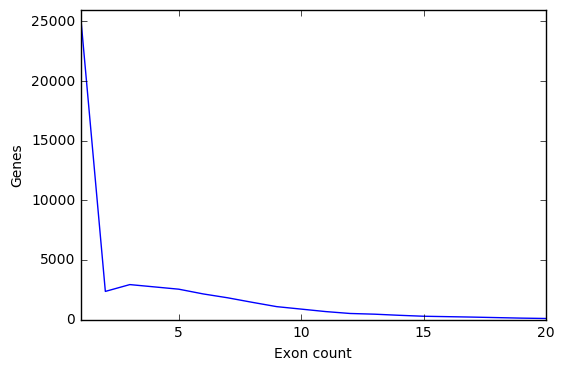

In [83]:
import matplotlib.pyplot as plt
plt.plot(rawGeneExons[0:200])
plt.axis([1, 20, 0, 26000])
plt.ylabel("Genes")
plt.xlabel("Exon count")
plt.show()

Or if you'd like the entire graph :

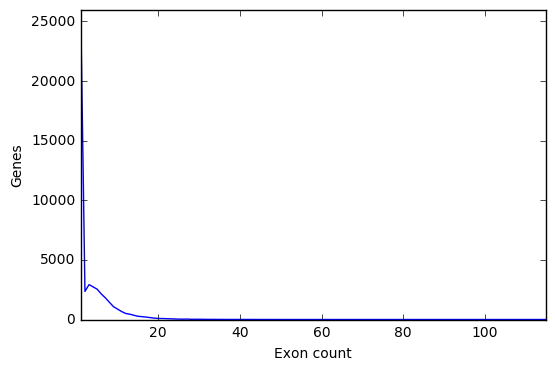

In [91]:
import matplotlib.pyplot as plt
plt.plot(rawGeneExons)
plt.axis([1, 115, 0, 26000])
plt.ylabel("Genes")
plt.xlabel("Exon count")
plt.show()

In [94]:
biggestGene = 0
for exonList in geneExons.values() :
    if len(exonList) > biggestGene :
        biggestGene = len(exonList)
print(biggestGene)

geneExons = {}
genome.seek(0)
for feature in genome :
    feature = readFeature(feature)
    if feature :
        if feature["type"] == "exon" :
            #Make sure the subcontainer exists
            if feature["gene_id"] not in geneExons :
                geneExons[feature["gene_id"]] = set()
            geneExons[feature["gene_id"]].add(feature["exon_id"])
            if len(geneExons[feature["gene_id"]]) == biggestGene :
                print("Biggest gene : " + feature["gene_id"] + " aka " + feature["gene_name"])

113
Biggest gene : WBGene00016006 aka fln-2
Biggest gene : WBGene00016006 aka fln-2
Biggest gene : WBGene00016006 aka fln-2
Biggest gene : WBGene00016006 aka fln-2
Biggest gene : WBGene00016006 aka fln-2
Biggest gene : WBGene00016006 aka fln-2
Biggest gene : WBGene00016006 aka fln-2
Biggest gene : WBGene00016006 aka fln-2
Biggest gene : WBGene00016006 aka fln-2
Biggest gene : WBGene00016006 aka fln-2
Biggest gene : WBGene00016006 aka fln-2
Biggest gene : WBGene00016006 aka fln-2
Biggest gene : WBGene00016006 aka fln-2
Biggest gene : WBGene00016006 aka fln-2
Biggest gene : WBGene00016006 aka fln-2
Biggest gene : WBGene00016006 aka fln-2
Biggest gene : WBGene00016006 aka fln-2
Biggest gene : WBGene00016006 aka fln-2
Biggest gene : WBGene00016006 aka fln-2
Biggest gene : WBGene00016006 aka fln-2
Biggest gene : WBGene00016006 aka fln-2
Biggest gene : WBGene00016006 aka fln-2
Biggest gene : WBGene00016006 aka fln-2
Biggest gene : WBGene00016006 aka fln-2
Biggest gene : WBGene00016006 aka fl

###### The gene with *the* most exons in C. elegans' genome is fln-2 with 113 exons.

>fln-2 is an ortholog of human Ehbp1 (EH domain binding protein 1); fln-2 is involved in locomotion and the molting cycle; fln-2 is expressed in the pharynx, anal depressor muscle, hypodermis, intestine, vulva, and the DTC. 
>
>(wormbase.org)

#### The End
